The below [autoreload](https://ipython.org/ipython-doc/3/config/extensions/autoreload.html) extension ensures that if any locally imported python files change, the modules defined there are reloaded

In [1]:
%load_ext autoreload
%autoreload 2

The below imports [`here`](https://pypi.org/project/pyprojroot/), which allows one to refer to the root directory of the project in a consistent manner across execution environments. It then adds `here()` (the root directory) to the system path to ensure that we can load python modules defined in the project.

In [2]:
from hereutil import here, add_to_sys_path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
add_to_sys_path(here())

Having ensured that the root path of the project is in the system path, we can load common basis functions from [src/common_basis.py](/src/common_basis.py). The template assumes that functions useful for most work be defined in `common_basis.py`, whereas code useful for individual analyses is defined where needed.

Here, we load the three datasets from parquet files using `load_abortion_parquet()`, `load_lynching_parquet()` and `load_incel_parquet()`. Each dataset is loaded as a dataclass with Pandas dataframes as its named attributes. Due to their total size of 4.6 gigabytes, the parquet files are not distributed in Git. Instead to download them from https://a3s.fi/dhh23-disc-parquet/, you can run `fetch-parquets.sh` within the `data/input/parquet` directory. Otherwise, the following code will certainly fail.

In [3]:
from src.common_basis import *

In [4]:
i = load_incel_parquet()
i

IncelData(incel_threads, incel_posts, incel_users, incel_quotes)

# How to get around the [pyarrow bug](https://github.com/apache/arrow/issues/33049)

In [5]:
import datetime
df = i.incel_posts
df

,post_id,post_id_str,poster_id,time_posted,post_content,post_html,thread_id,post_order_in_thread
0,1,post-8897672,0,2022-06-02 01:02:35,Or maybe she just realized Chad will never com...,"<div class=""message-content js-messageContent""...",0,1
1,2,post-8897678,1,2022-06-02 01:04:16,Ofc Chad will never commit to a crazy bpd toilet.,"<div class=""message-content js-messageContent""...",0,2
2,3,post-8897741,2,2022-06-02 01:12:32,Ill give her a ride in exchange for some head.,"<div class=""message-content js-messageContent""...",0,3
3,4,post-8897798,0,2022-06-02 01:20:35,A man doing the same thing would have been sub...,"<div class=""message-content js-messageContent""...",0,4
4,5,post-8898099,3,2022-06-02 02:25:56,ControlledInsanity said: A man doing the ...,"<div class=""message-content js-messageContent""...",0,5
...,...,...,...,...,...,...,...,...
2266019,2266019,post-65986,1111,2017-12-01 00:25:46,WarmIncelation said: From my perspective ...,"<div class=""message-content js-messageContent""...",125921,33
2266020,2266020,post-66068,444,2017-12-01 01:00:02,universallyabhorred said: Finally it is w...,"<div class=""message-content js-messageContent""...",125921,34
2266021,2266021,post-66078,1111,2017-12-01 01:03:54,nausea said: I am sure the admin and the ...,"<div class=""message-content js-messageContent""...",125921,35
2266022,2266022,post-66110,444,2017-12-01 01:23:43,universallyabhorred said: Admins don't gi...,"<div class=""message-content js-messageContent""...",125921,36


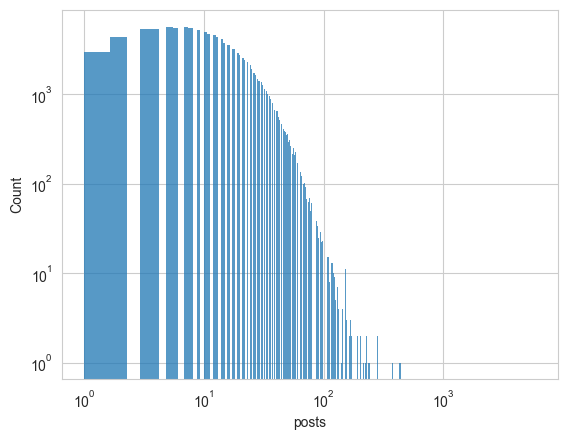

In [6]:
sns.histplot(i.incel_threads['posts'])
#log y scale
plt.yscale('log')
plt.xscale('log')
plt.show()

<Axes: xlabel='poster_id', ylabel='Count'>

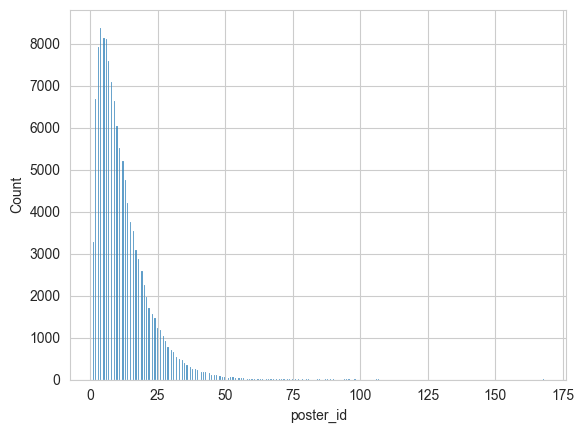

In [7]:
sns.histplot(i.incel_posts.groupby(['thread_id'])['poster_id'].nunique().reset_index()['poster_id'])

In [9]:
i.incel_threads[(i.incel_threads.posts < 160) & (i.incel_threads.thread_label == 'RageFuel')].sort_values('posts',ascending=False).head(5)
# i.incel_threads[(i.incel_threads.thread_title == 'Cops kill a gamercel')]

,thread_id,thread_title,thread_label,thread_url,earliest_time_posted,latest_time_posted,posts
102848,102848,This forum is a failure,RageFuel,https://incels.is/threads/this-forum-is-a-fail...,2019-11-25 23:41:53,2020-04-06 14:27:45,145
39533,39533,HiddenUzer Exposed,RageFuel,https://incels.is/threads/hiddenuzer-exposed.4...,2022-11-02 11:49:35,2023-04-05 09:05:20,128
18616,18616,Cops kill a gamercel,RageFuel,https://incels.is/threads/cops-kill-a-gamercel...,2020-08-09 12:50:04,2020-08-12 09:16:23,127
79862,79862,Nigger knocks out a white man and white foids ...,RageFuel,https://incels.is/threads/nigger-knocks-out-a-...,2021-10-11 04:40:25,2022-04-28 04:01:01,121
14941,14941,Bushladen008 is a piece of shit inceltears sym...,RageFuel,https://incels.is/threads/bushladen008-is-a-pi...,2018-03-17 01:01:04,2018-03-19 14:38:21,119


In [10]:
df1 = i.incel_posts[:1000000]
df2  = i.incel_posts[1000000:]

In [11]:
class TreeNode:
    def __init__(self, post_id, post_order_in_thread, poster_id, content = None, keyword = None):
        self.post_id = post_id
        self.content = content
        self.post_order_in_thread = post_order_in_thread
        self.children = []
        self.parent = None
        self.poster_id = poster_id
        self.keyword = keyword


    def add_child(self, child_node):
        self.children.append(child_node)

    def add_parent(self, parent_node):
        self.parent = parent_node

    def remove_child(self, child_node):
        if child_node in self.children:
            self.children.remove(child_node)
    def traverse(self):
        nodes = [self]
        while len(nodes) > 0:
            current_node = nodes.pop()
            nodes.extend(current_node.children)
            yield current_node
class Tree:
    def __init__(self, thread_id, title, root_node, nodes):
        self.thread_id = thread_id
        self.title = title
        self.root_node = root_node
        self.nodes = nodes #dict of nodes, key is their order in the thread, value is the node class

In [12]:
quotes_relation_df = i.incel_quotes.groupby(['quoted_post_id'])['quoting_post_id'].agg(list).reset_index()
quotes_relation_df

,quoted_post_id,quoting_post_id
0,0,"[10, 55, 132, 134, 135, 136, 152, 242, 248, 25..."
1,1,[7]
2,4,[5]
3,10,[11]
4,11,"[12, 14]"
...,...,...
804784,2265970,[2265971]
804785,2265971,[2265973]
804786,2265972,[2265975]
804787,2265983,"[2265984, 2265986]"


In [13]:
from PrettyPrint import PrettyPrintTree
from colorama import Back, Fore, Style

def build_conversation_tree(thread_id, df_post, df_thread, quotes_relation_df, keyword = False):
    #build the conversation tree of thread_id
    df1 = df_post[:1000000]
    df2  = df_post[1000000:]

    df = df1[df1['thread_id'] == thread_id]
    df = pd.concat([df, df2[df2['thread_id'] == thread_id]])
    df = df.sort_values('post_order_in_thread', ascending=True)

    keys = df['post_id'].tolist()
    values = df['post_order_in_thread'].tolist()
    post_dict = dict(zip(keys, values))

    title = df_thread[df_thread['thread_id'] == thread_id]['thread_title'].values[0]

    tree_nodes = dict()#key: post order in thread, value: TreeNode of this post
    root_node = None


    for index, row in df.iterrows(): #create tree nodes for each post within the thread
        if keyword:
            tree_nodes[row['post_order_in_thread']] = TreeNode(row['post_id'], row['post_order_in_thread'], row['poster_id'], row['post_content'], row['contain_keyword'],)
        else:
            tree_nodes[row['post_order_in_thread']] = TreeNode(row['post_id'], row['post_order_in_thread'], row['poster_id'], row['post_content'])
    if keyword:
        root_node = TreeNode(post_id = 0, post_order_in_thread = 0, poster_id = 0, content = title, keyword = False) # root node is the title in the thread (topic)
    else:
        root_node = TreeNode(post_id = 0, post_order_in_thread = 0, poster_id = 0, content = title) # root node is the title in the thread (topic)

    tree_nodes[0] = root_node

    for index, row in quotes_relation_df.iterrows():
        # if row['quoted_post_id'] == 0: #the post which is not quoting any post, it replies to the root node (topic) directly
        #     for post_id in row['quoting_post_id']:
        #         if post_id in post_dict:
        #             root_node.add_child(tree_nodes[post_dict[post_id]])
        if row['quoted_post_id'] in post_dict: # if quoted post exists in this thread
            current_node = tree_nodes[post_dict[row['quoted_post_id']]]
            for post_id in row['quoting_post_id']:
                if post_id in post_dict:
                    current_node.add_child(tree_nodes[post_dict[post_id]]) # add child node
                    tree_nodes[post_dict[post_id]].add_parent(current_node) # add parent node

    #the post which is not quoting any post, it replies to the root node (topic) directly, so we add it to the children of root node
    for node in tree_nodes.values():
        if node.parent is None and node.post_order_in_thread != 0:
            node.add_parent(root_node)
            root_node.add_child(node)
    
    tree = Tree(thread_id, title, root_node, tree_nodes)
    return root_node, tree, df



def plot_tree(root_node):
    pt = PrettyPrintTree(lambda x: x.children, lambda x: x.post_order_in_thread, lambda x:x.poster_id, label_color = Fore.RED)
    pt(root_node)


In [14]:
def extract_sub_conversation(node, discussion_list, path, path_len):
    if node is None:
        return discussion_list 
    if len(path) > path_len:
        path[path_len] = node
    else:
        path.append(node)

    path_len = path_len + 1

    if len(node.children) == 0:
        discussion_list.append(path[:path_len])
    else:
        for child in node.children:
            discussion_list = extract_sub_conversation(child, discussion_list, path, path_len)
    return discussion_list

# fakecel and trucel subset

In [16]:
# get all posts that mention “fakecel”
df1 = i.incel_posts[:1000000]
df2  = i.incel_posts[1000000:]
fakecel_posts_only = df1[df1["post_content"].str.contains("fakecel")]
fakecel_posts_only = pd.concat([fakecel_posts_only, df2[df2["post_content"].str.contains("fakecel")]])
fakecel_posts_only

,post_id,post_id_str,poster_id,time_posted,post_content,post_html,thread_id,post_order_in_thread
322,501,post-1541099,187,2018-10-10 22:37:36,03:37. The clock ticks on and the fakecels slu...,"<div class=""message-content js-messageContent""...",28,4
459,685,post-5611991,270,2020-10-04 02:15:50,"Yep, you can tell who the fakecels are by thei...","<div class=""message-content js-messageContent""...",41,2
505,758,post-3663856,298,2020-01-17 16:02:46,Anyone who goes out on weekends is a fakecel.,"<div class=""message-content js-messageContent""...",44,18
651,498,post-1541075,184,2018-10-10 22:34:32,all the chads and larpers sleeping now i knew ...,"<div class=""message-content js-messageContent""...",28,1
871,674,post-10001009,266,2022-11-06 08:06:18,Betrayed said: 16 Click to expand... bt...,"<div class=""message-content js-messageContent""...",39,21
...,...,...,...,...,...,...,...,...
2265558,2265288,post-3767133,1154,2020-02-04 06:32:55,I just wish they wouldn't immedianlty assume y...,"<div class=""message-content js-messageContent""...",125876,48
2265559,2265290,post-3767151,560,2020-02-04 06:40:01,JohnWickCel said: I just wish they wouldn...,"<div class=""message-content js-messageContent""...",125876,50
2265843,2265775,post-641548,549,2018-04-16 18:30:54,Lonelyvirgin said: Anyone who spends a lo...,"<div class=""message-content js-messageContent""...",125916,37
2265844,2265776,post-641563,148,2018-04-16 18:32:54,WorldRulerAisha said: tell that to the fa...,"<div class=""message-content js-messageContent""...",125916,38


In [17]:
fakecel_thread_ids = fakecel_posts_only['thread_id'].to_list()
fakecel_threads_df = i.incel_threads[i.incel_threads['thread_id'].isin(fakecel_thread_ids)]
number_fakecel_per_threads = fakecel_posts_only.groupby('thread_id')['post_id'].count().sort_values(ascending=False).reset_index().rename(columns={'post_id':'number_fakecel'})
fakecel_threads_df = fakecel_threads_df.merge(number_fakecel_per_threads, on='thread_id', how='left').sort_values(by='number_fakecel', ascending=False)
fakecel_threads_df['percent_fakecel'] = fakecel_threads_df['number_fakecel'] / fakecel_threads_df['posts']
fakecel_threads_df.head(10)

,thread_id,thread_title,thread_label,thread_url,earliest_time_posted,latest_time_posted,posts,number_fakecel,percent_fakecel
590,17947,@Colvin exposed himself,JFL,https://incels.is/threads/colvin-exposed-himse...,2021-02-13 09:11:06,2021-02-17 19:35:08,168,41,0.244048
2251,60945,"Incels.co's ""Mad Dogs""",Theory,https://incels.is/threads/incels-cos-mad-dogs....,2020-10-31 08:47:43,2020-11-04 15:38:56,78,35,0.448718
3138,86408,Prior signs of Insomniac of being a fakecel,Discussion,https://incels.is/threads/prior-signs-of-insom...,2019-10-17 04:38:48,2019-10-18 21:38:37,111,34,0.306306
2417,64588,its actually insane how many people i called a...,Serious,https://incels.is/threads/its-actually-insane-...,2019-07-14 15:33:07,2019-07-15 12:10:11,85,32,0.376471
4078,112495,What HAPPENED To these users ???,<NA>,https://incels.is/threads/what-happened-to-the...,2018-04-06 01:13:35,2018-05-11 15:50:32,187,32,0.171123
2652,71952,[Low Inhib] How many confirmed fakecels are cu...,<NA>,https://incels.is/threads/low-inhib-how-many-c...,2019-02-28 12:10:34,2019-05-07 23:42:49,107,31,0.289720
168,4985,Another fakecel bite the dust,JFL,https://incels.is/threads/another-fakecel-bite...,2019-08-18 18:37:00,2019-08-26 10:02:14,73,29,0.397260
1371,39533,HiddenUzer Exposed,RageFuel,https://incels.is/threads/hiddenuzer-exposed.4...,2022-11-02 11:49:35,2023-04-05 09:05:20,128,28,0.218750
99,2842,Accusations of fakeceldom are too rampant.,<NA>,https://incels.is/threads/accusations-of-fakec...,2023-03-16 04:53:15,2023-03-16 23:22:03,50,27,0.540000
3404,94265,So what did I miss?,<NA>,https://incels.is/threads/so-what-did-i-miss.8...,2018-10-05 21:18:47,2018-10-08 08:31:21,87,25,0.287356


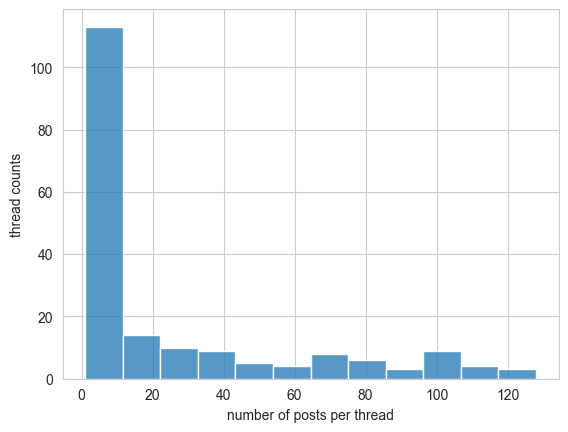

In [18]:
sns.histplot(fakecel_threads_df['posts'].value_counts())
plt.xlabel('number of posts per thread')
plt.ylabel('thread counts')
plt.show()

### **fakecel_posts_df** contains all the posts that within a thread that talking about fakecel

In [19]:
KEYWORD = 'fakecel'

In [20]:
fakecel_posts_df = df1[df1["thread_id"].isin(fakecel_thread_ids)]
fakecel_posts_df = pd.concat([fakecel_posts_df, df2[df2["thread_id"].isin(fakecel_thread_ids)]])
fakecel_posts_df = fakecel_posts_df.merge(quotes_relation_df, left_on='post_id', right_on='quoted_post_id', how='left').drop(columns=['quoted_post_id']).rename(columns={'post_id_x': 'post_id', 'quoting_post_id': 'replies'})
fakecel_posts_df['contain_keyword'] = fakecel_posts_df['post_content'].str.contains(KEYWORD)
fakecel_posts_df['number_of_replies'] = fakecel_posts_df['replies'].apply(lambda x: len(x) if type(x) == list else 0)


In [21]:
from bs4 import BeautifulSoup
fakecel_posts_df['cleaned_text'] = fakecel_posts_df['post_html']\
    .apply(lambda x: BeautifulSoup(x, 'html.parser')
           .find('div', class_='bbWrapper')
           .find_all(string=True, recursive=False))\
    .apply(lambda x: ' '.join(x))
fakecel_posts_df.drop(columns=['post_html'], inplace=True)

fakecel_posts_df['contain_keyword_clean_text'] = fakecel_posts_df['cleaned_text'].str.contains(KEYWORD)
fakecel_posts_df

,post_id,post_id_str,poster_id,time_posted,post_content,thread_id,post_order_in_thread,replies,contain_keyword,number_of_replies,cleaned_text,contain_keyword_clean_text
0,500,post-1541096,186,2018-10-10 22:37:19,Iam up with you bro,28,3,NaN,False,0,Iam up with you bro,False
1,501,post-1541099,187,2018-10-10 22:37:36,03:37. The clock ticks on and the fakecels slu...,28,4,NaN,True,0,03:37. The clock ticks on and the fakecels slu...,True
2,502,post-1541160,188,2018-10-10 22:47:34,Its 11 pm in my country though,28,5,NaN,False,0,Its 11 pm in my country though,False
3,503,post-1541163,189,2018-10-10 22:47:47,iktf.. 4:47 here,28,6,NaN,False,0,iktf.. 4:47 here,False
4,504,post-1541169,20,2018-10-10 22:48:31,8:48 here.,28,7,NaN,False,0,8:48 here.,False
...,...,...,...,...,...,...,...,...,...,...,...,...
171494,2265982,post-2033864,432,2019-01-24 04:34:29,Yes and no. Yes because his posts can be ente...,125920,58,NaN,True,0,Yes and no. \n \nYes because his posts can be ...,True
171495,2265983,post-2033897,857,2019-01-24 04:43:30,Eskimocel said: They support low iq threa...,125920,59,"[2265984, 2265986]",False,2,\n \nWhat you guys aren't understanding is tha...,False
171496,2265984,post-2033973,527,2019-01-24 05:08:25,RageAgainstTDL said: What you guys aren't...,125920,60,[2265985],False,1,speak English \n \nall those fancy words make...,False
171497,2265985,post-2034207,262,2019-01-24 06:26:41,Sadist said: RageAgainstTDL said: Wh...,125920,61,NaN,False,0,ngl,False


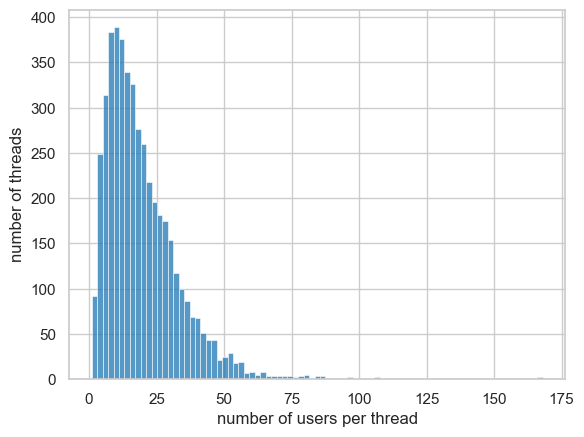

In [518]:
sns.histplot(fakecel_posts_df.groupby('thread_id')['poster_id'].nunique().sort_values(ascending=False))
plt.xlabel('number of users per thread')
plt.ylabel('number of threads')
plt.show()

In [22]:
num_fakecel_posts_with_replies = len(fakecel_posts_df[(fakecel_posts_df['number_of_replies'] > 0) & (fakecel_posts_df['contain_keyword'] == True)])
num_fakecel_posts = len(fakecel_posts_df[fakecel_posts_df['contain_keyword'] == True])
num_posts_with_replies = len(fakecel_posts_df[fakecel_posts_df['number_of_replies'] > 0])
num_posts = len(fakecel_posts_df)

In [23]:
print('number of fakecel posts with replies: ', num_fakecel_posts_with_replies)
print('number of fakecel posts: ', num_fakecel_posts)
print('number of posts with replies: ', num_posts_with_replies)
print('number of posts: ', num_posts)

number of fakecel posts with replies:  5184
number of fakecel posts:  11432
number of posts with replies:  70784
number of posts:  171499


In [25]:
from scipy.stats import ttest_ind
fakecel_reply_dis = fakecel_posts_df[(fakecel_posts_df['contain_keyword'] == True)]['number_of_replies']
reply_dis = fakecel_posts_df['number_of_replies']

stat, p_value = ttest_ind(fakecel_reply_dis,reply_dis)
p_value

1.4251797877291845e-18

In [26]:
fakecel_posts_df[(fakecel_posts_df['contain_keyword_clean_text'] == True)]['number_of_replies'].mean()

0.6814095127610209

In [27]:
fakecel_posts_df['number_of_replies'].mean()

0.5341897037300509

In [28]:
num_fakecel_posts_with_replies_clen = len(fakecel_posts_df[(fakecel_posts_df['number_of_replies'] > 0) & (fakecel_posts_df['contain_keyword_clean_text'] == True)])
num_fakecel_posts_clean = len(fakecel_posts_df[fakecel_posts_df['contain_keyword_clean_text'] == True])

In [29]:
print('number of fakecel posts (clean text) with replies: ', num_fakecel_posts_with_replies_clen)
print('number of fakecel posts (clean text): ', num_fakecel_posts_clean)

number of fakecel posts (clean text) with replies:  3379
number of fakecel posts (clean text):  6896


<Axes: xlabel='percent_fakecel', ylabel='Count'>

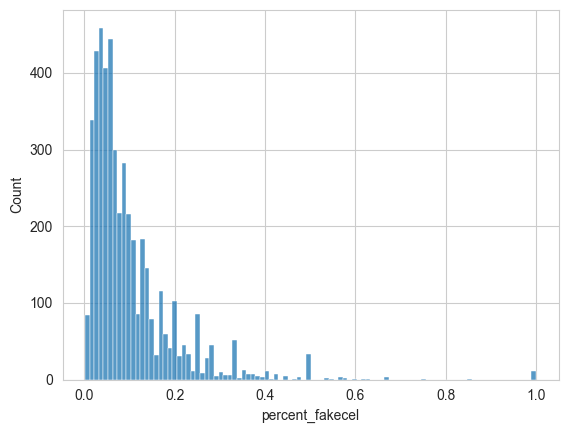

In [30]:
sns.histplot(fakecel_threads_df['percent_fakecel'])

## Sub-conversation started by 'fakecel' posts Analysis

In [31]:
def get_one_sub_conversation(discussion_list):
    #get the sub-conversation that contains the most keyword post, if the keyword post is the same, get the longest sub-conversation
    df = pd.DataFrame(columns=['discussion', 'num_keyword', 'length'])
    for discussion in discussion_list:
        num_keyword = sum([node.keyword for node in discussion])
        length = len(discussion)
        df = pd.concat([df, pd.DataFrame([[discussion, num_keyword, length]], columns=['discussion', 'num_keyword', 'length'])])
    df = df.sort_values(by=['num_keyword', 'length'], ascending=False)
    return df.iloc[0]['discussion']

In [32]:
def add_sub_conversation(row, tree):
    #get the length of the sub-conversation
    if row['contain_keyword']:
        sub_conversation = get_one_sub_conversation(extract_sub_conversation(tree.nodes[row['post_order_in_thread']], [], [], 0))
        posts_id = [node.post_id for node in sub_conversation]
    else:
        posts_id = None
    return posts_id

In [33]:
def extract_sub_conversations(node, discussion_list, path, path_len):
    #extract all the sub-conversation from a node
    if node is None:
        return discussion_list 
    if len(path) > path_len:
        path[path_len] = node
    else:
        path.append(node)

    path_len = path_len + 1

    if len(node.children) == 0:
        discussion_list.append(path[:path_len])
    else:
        for child in node.children:
            discussion_list = extract_sub_conversation(child, discussion_list, path, path_len)
    return discussion_list

In [34]:
df_sample_thread = fakecel_threads_df[(fakecel_threads_df['posts']>20) & (fakecel_threads_df['number_fakecel']>1)].sample(500, random_state=42)

In [35]:
df_sample_thread.head(5)

,thread_id,thread_title,thread_label,thread_url,earliest_time_posted,latest_time_posted,posts,number_fakecel,percent_fakecel
2576,69999,Lets act like Fakecels.,<NA>,https://incels.is/threads/lets-act-like-fakece...,2018-03-29 19:01:31,2018-03-30 14:20:07,58,2,0.034483
1625,45715,I damn miss 2001 2002 2003,<NA>,https://incels.is/threads/i-damn-miss-2001-200...,2022-10-27 10:10:07,2022-10-27 11:06:10,28,2,0.071429
561,16851,Change IP address,Serious,https://incels.is/threads/change-ip-address.34...,2021-12-28 07:58:30,2022-01-11 23:26:07,24,2,0.083333
4242,116683,Where is @RageAgainstTDL?,Serious,https://incels.is/threads/where-is-rageagainst...,2019-04-12 16:53:48,2019-11-20 21:31:10,49,3,0.061224
3085,85241,"[poll] if there was a local incel meetup, woul...",Serious,https://incels.is/threads/poll-if-there-was-a-...,2020-03-30 01:26:24,2020-03-30 22:01:52,84,5,0.059524


In [665]:
from tqdm import tqdm
avg_subconversation_length = []
posts_sample_df = fakecel_posts_df[fakecel_posts_df['thread_id'].isin(df_sample_thread['thread_id'].to_list())]
for index, row in tqdm(df_sample_thread.iterrows()):
    root_node, tree, df_test= build_conversation_tree(thread_id = row['thread_id'], df_post = posts_sample_df, df_thread = df_sample_thread, quotes_relation_df = quotes_relation_df, keyword=True)
    df_test['sub_conversation'] = df_test.apply(lambda x: add_sub_conversation(x, tree), axis = 1)
    df_test['length_of_sub_conversation'] = df_test['sub_conversation'].apply(lambda x: len(x) if x is not None else None)
    avg_subconversation_length.append(df_test['length_of_sub_conversation'].mean())

500it [2:33:19, 18.40s/it]


In [666]:
sum(avg_subconversation_length)/len(avg_subconversation_length)

2.4070677647515897

### Check for an example

In [615]:
root_node, tree, df_test= build_conversation_tree(thread_id = 56107, df_post = fakecel_posts_df, df_thread = fakecel_threads_df, quotes_relation_df = quotes_relation_df, keyword=True)

In [616]:
plot_tree(root_node)

                                                                                                                            │
                                                                                                                            │
                                                                                                                            0 
            ┌───────────────────────┬──────────────────────────────┬─────────────┬──────┬─────┬─────┬─────┬─────────────────┴──┬────────────────┬──────┬──────┬───────────┬─────────┬─────┬──────────────────────┬──────┬─────┬──────┬─────┐
          1402                    1363                           1214           641   7154   649   263   463                  945              668   1813   1203         432      5831   37                     952   1103   531   2209   290 
            │                       │                              │             │      │     │     │     │                    │                │

In [623]:
df_test['sub_conversation'] = df_test.apply(lambda x: add_sub_conversation(x, tree), axis = 1)
df_test['length_of_sub_conversation'] = df_test['sub_conversation'].apply(lambda x: len(x) if x is not None else None)
df_test.length_of_sub_conversation.value_counts()

length_of_sub_conversation
1.0    7
2.0    2
3.0    1
6.0    1
5.0    1
Name: count, dtype: int64

In [624]:
df_test['length_of_sub_conversation'].mean()

2.0833333333333335

# **Hypothesis**: long line length may be argument, more users could shorten the line length
### dataset: whole dataset

In [36]:
NUM_ONE_REPLY_THRESHOLD = 15

In [37]:
df1 = i.incel_posts[:1000000]
df2 = i.incel_posts[1000000:]

## drop the quoting pairs that not belong to one thread

In [38]:
tdf1 = i.incel_quotes.merge(df1[['post_id', 'thread_id']], left_on='quoting_post_id', right_on='post_id', how='inner').drop(columns=['post_id']).rename(columns={'thread_id': 'quoting_thread_id'})
tdf2 = i.incel_quotes.merge(df2[['post_id', 'thread_id']], left_on='quoting_post_id', right_on='post_id', how='inner').drop(columns=['post_id']).rename(columns={'thread_id': 'quoting_thread_id'})
incel_quotes = pd.concat([tdf1, tdf2])

tdf3 = i.incel_quotes[i.incel_quotes['quoted_post_id'] == 0]
tdf1 = incel_quotes.merge(df1[['post_id', 'thread_id']], left_on='quoted_post_id', right_on='post_id', how='inner').drop(columns=['post_id']).rename(columns={'thread_id': 'quoted_thread_id'})
tdf2 = incel_quotes.merge(df2[['post_id', 'thread_id']], left_on='quoted_post_id', right_on='post_id', how='inner').drop(columns=['post_id']).rename(columns={'thread_id': 'quoted_thread_id'})
incel_quotes = pd.concat([tdf1, tdf2])
incel_quotes.drop(incel_quotes[incel_quotes['quoting_thread_id'] != incel_quotes['quoted_thread_id']].index, inplace=True)
incel_quotes.drop(columns = ['quoting_thread_id', 'quoted_thread_id'], inplace=True)

incel_quotes = pd.concat([incel_quotes, tdf3], ignore_index=True)
incel_quotes

,quoting_post_id,quoted_post_id,quote_content
0,7,1,Or maybe she just realized Chad will never co...
1,11,10,Whats the deal with these greycels who do thi...
2,12,11,They are your dad's BBC bull
3,14,11,They are your dad's BBC bull
4,29,28,Follows me
...,...,...,...
1053770,2265145,0,OP asks a lot of questions to zoomercels... ...
1053771,2265518,0,If it wasnt for his money he’d be posting here
1053772,2265520,0,If it wasnt for his money he’d be posting here
1053773,2265524,0,If it wasnt for his money he’d be posting here


In [39]:
df1 = df1.merge(quotes_relation_df, left_on='post_id', right_on='quoted_post_id', how='left').drop(columns=['quoted_post_id']).rename(columns={'post_id_x': 'post_id', 'quoting_post_id': 'replies'})
df1['number_of_replies'] = df1['replies'].apply(lambda x: len(x) if type(x) == list else 0)
df2 = df2.merge(quotes_relation_df, left_on='post_id', right_on='quoted_post_id', how='left').drop(columns=['quoted_post_id']).rename(columns={'post_id_x': 'post_id', 'quoting_post_id': 'replies'})
df2['number_of_replies'] = df2['replies'].apply(lambda x: len(x) if type(x) == list else 0)

In [40]:
posts_df_reply_one = pd.concat([df1[df1['number_of_replies'] == 1], df2[df2['number_of_replies'] == 1]])


### threads which has more than 15 posts with only one reply

In [41]:

threads_df_reply_one = posts_df_reply_one.groupby('thread_id')['number_of_replies'].count().reset_index().rename(columns={'number_of_replies': 'number_of_one_reply'})
thread_ids = threads_df_reply_one[threads_df_reply_one['number_of_one_reply'] > NUM_ONE_REPLY_THRESHOLD ]['thread_id']
len(thread_ids)

7965

In [42]:
df_posts = pd.concat([df1.merge(thread_ids, on='thread_id', how='inner'), df2.merge(thread_ids, on='thread_id', how='inner')]).reset_index(drop=True)

In [43]:
posts_df_reply_one = posts_df_reply_one.merge(thread_ids, on='thread_id', how='inner')
posts_df_reply_one #posts with only one reply of the threads which has more than 10 posts with only one reply

,post_id,post_id_str,poster_id,time_posted,post_content,post_html,thread_id,post_order_in_thread,replies,number_of_replies
0,199,post-3351204,42,2019-11-21 08:04:44,Congratulations buddy boi. May S.tBlackOps2cel...,"<div class=""message-content js-messageContent""...",9,2,[200],1
1,205,post-3351263,51,2019-11-21 08:25:39,damn boyo,"<div class=""message-content js-messageContent""...",9,8,[206],1
2,208,post-3351279,54,2019-11-21 08:30:49,Nice work tbh,"<div class=""message-content js-messageContent""...",9,11,[210],1
3,214,post-3352067,107,2019-11-21 11:43:22,Da fuck?? You must've been shitposting day and...,"<div class=""message-content js-messageContent""...",9,17,[233],1
4,217,post-3352084,108,2019-11-21 11:46:23,Red colour screen name.,"<div class=""message-content js-messageContent""...",9,20,[218],1
...,...,...,...,...,...,...,...,...,...,...
206137,2265968,post-2023679,240,2019-01-22 12:33:40,Sniffles said: Click to expand... He w...,"<div class=""message-content js-messageContent""...",125920,44,[2265969],1
206138,2265970,post-2023715,240,2019-01-22 12:40:23,Sniffles said: Was he the hardest spammer...,"<div class=""message-content js-messageContent""...",125920,46,[2265971],1
206139,2265971,post-2023731,210,2019-01-22 12:43:27,"StaroRavager said: No, many of his posts ...","<div class=""message-content js-messageContent""...",125920,47,[2265973],1
206140,2265972,post-2023738,200,2019-01-22 12:44:15,Sniffles said: Was he the hardest spammer...,"<div class=""message-content js-messageContent""...",125920,48,[2265975],1


In [44]:
df_child = incel_quotes.merge(posts_df_reply_one['post_id'], left_on='quoted_post_id', right_on= 'post_id', how='inner').drop(columns=['post_id'])
df_parent = incel_quotes.merge(posts_df_reply_one['post_id'], left_on='quoting_post_id', right_on= 'post_id', how='inner').drop(columns=['post_id'])
df_quotes = pd.concat([df_child, df_parent]).drop_duplicates()
df_quotes

,quoting_post_id,quoted_post_id,quote_content
0,200,199,Congratulations buddy boi. May S.tBlackOps2ce...
1,201,200,Thanks boyo
2,207,206,
3,211,204,over for me
4,218,217,Red colour screen name.
...,...,...,...
148671,2264483,0,test
148672,2264533,0,95% of your entire thread is plagiarized. You...
148673,2264535,0,95% of your entire thread is plagiarized. You...
148674,2264557,0,Live footage of you in this thread: View atta...


In [45]:
df_child = df_quotes.merge(df_posts['post_id'], left_on='quoted_post_id', right_on= 'post_id', how='inner').drop(columns=['post_id'])
df_parent = df_quotes.merge(df_posts['post_id'], left_on='quoting_post_id', right_on= 'post_id', how='inner').drop(columns=['post_id'])
df_quotes = pd.concat([df_child, df_parent]).drop_duplicates()
quoting_to_parent = dict(zip(df_quotes['quoting_post_id'], df_quotes['quoted_post_id']))
quotes_to_reply = dict(zip(df_quotes['quoted_post_id'], df_quotes['quoting_post_id']))

In [46]:
df_posts = df_posts.sort_values(by=['thread_id','post_order_in_thread'])
df_posts['line_id'] = None
# df_posts = df_posts.head(500)

In [47]:
df_posts

,post_id,post_id_str,poster_id,time_posted,post_content,post_html,thread_id,post_order_in_thread,replies,number_of_replies,line_id
16,198,post-3351202,99,2019-11-21 08:03:07,TFW YOU'RE FINALLY LUMINARY! Beautiful RED!!!!...,"<div class=""message-content js-messageContent""...",9,1,[220],1,None
0,199,post-3351204,42,2019-11-21 08:04:44,Congratulations buddy boi. May S.tBlackOps2cel...,"<div class=""message-content js-messageContent""...",9,2,[200],1,None
17,200,post-3351206,99,2019-11-21 08:05:10,Monk of Failure said: Congratulations bud...,"<div class=""message-content js-messageContent""...",9,3,[201],1,None
18,201,post-3351208,42,2019-11-21 08:05:56,Vermilioncore said: Thanks boyo Click t...,"<div class=""message-content js-messageContent""...",9,4,[202],1,None
19,202,post-3351210,99,2019-11-21 08:06:35,"Monk of Failure said: Hopefully, you beco...","<div class=""message-content js-messageContent""...",9,5,[203],1,None
...,...,...,...,...,...,...,...,...,...,...,...
496348,2265982,post-2033864,432,2019-01-24 04:34:29,Yes and no. Yes because his posts can be ente...,"<div class=""message-content js-messageContent""...",125920,58,NaN,0,None
496349,2265983,post-2033897,857,2019-01-24 04:43:30,Eskimocel said: They support low iq threa...,"<div class=""message-content js-messageContent""...",125920,59,"[2265984, 2265986]",2,None
496350,2265984,post-2033973,527,2019-01-24 05:08:25,RageAgainstTDL said: What you guys aren't...,"<div class=""message-content js-messageContent""...",125920,60,[2265985],1,None
496351,2265985,post-2034207,262,2019-01-24 06:26:41,Sadist said: RageAgainstTDL said: Wh...,"<div class=""message-content js-messageContent""...",125920,61,NaN,0,None


In [274]:
line_id = 0
df_new = []
for index, row in df_posts.iterrows():
    parent_post_id = quoting_to_parent[row['post_id']] if row['post_id'] in quoting_to_parent.keys() else None 
    chid_post_id = quotes_to_reply[row['post_id']] if row['post_id'] in quotes_to_reply.keys() else None
    if parent_post_id and parent_post_id >= 0: #if the post is a reply
        try:
            parent_index = df_posts[df_posts['post_id'] == parent_post_id].index[0]
        except:
            print(parent_post_id)
            print(row['post_id'])
            break
        if parent_post_id == 0: #reply to the topic
            if chid_post_id:
                line_id = line_id + 1
                df_posts.loc[index,'line_id'] = line_id

        if df_posts.loc[parent_index]['number_of_replies'] == 1: #if the parent post has only one reply
            df_posts.loc[index,'line_id'] = df_posts[df_posts['post_id'] == parent_post_id]['line_id'].values[0]
        else: #if the parent post has more than one reply, create a new line and add a new row in df which represents the parent post
            line_id = line_id + 1
            df_posts.loc[index,'line_id'] = line_id
            new_row = df_posts.loc[parent_index].copy()
            new_row['line_id'] = line_id
            new_row = pd.DataFrame(new_row).T
            df_new.append(new_row)
            
    else:
        if chid_post_id:#if the post has one reply
            line_id = line_id + 1
            df_posts.loc[index,'line_id'] = line_id
df_new = pd.concat(df_new, ignore_index=True)
df_posts = pd.concat([df_posts, df_new], ignore_index=True)
            

In [275]:
df_posts.to_csv('df_posts.csv', index=False)

### **long line** conversation analysis, long line: message >= 6

In [48]:
df_posts = pd.read_csv('df_posts.csv')

In [49]:
LONG_LINE_THRESHOLD = 6

In [50]:
df_temp = df_posts.groupby('line_id')['post_id'].count().reset_index().rename(columns={'post_id': 'number_of_posts_per_line'}).sort_values(by='number_of_posts_per_line', ascending=False)
df_lone_line_ids = df_temp[df_temp['number_of_posts_per_line'] >= LONG_LINE_THRESHOLD]['line_id']
df_posts = df_posts[df_posts['line_id'].isin(df_lone_line_ids)]
df_posts

,post_id,post_id_str,poster_id,time_posted,post_content,post_html,thread_id,post_order_in_thread,replies,number_of_replies,line_id
72,340,post-4220614,61,2020-04-07 11:43:48,\n\nTheSecondComing said:\n\n\n\nwhat is nyour...,"<div class=""message-content js-messageContent""...",11,33,[341],1,16.0
73,341,post-4220629,38,2020-04-07 11:47:12,\n\nAnimecel2D said:\n\n\n\nidk. What is yours...,"<div class=""message-content js-messageContent""...",11,34,[343],1,16.0
75,343,post-4220635,61,2020-04-07 11:48:04,"\n\nTheSecondComing said:\n\n\n\nnone, ill sti...","<div class=""message-content js-messageContent""...",11,36,[344],1,16.0
76,344,post-4220640,38,2020-04-07 11:48:43,\n\nAnimecel2D said:\n\n\n\nneither am i tbh\n...,"<div class=""message-content js-messageContent""...",11,37,[345],1,16.0
77,345,post-4220641,61,2020-04-07 11:49:08,\n\nTheSecondComing said:\n\n\n\nbit of a cope...,"<div class=""message-content js-messageContent""...",11,38,[346],1,16.0
...,...,...,...,...,...,...,...,...,...,...,...
531525,2264315,post-1470275,1085,2018-09-28 19:05:58,\n\nAdoring Fan said:\n\n\n\n１．死にたい\n2．しょうがないね...,"<div class=""message-content js-messageContent""...",125835,77,"[2264316, 2264317]",2,110510.0
531542,2265471,post-6619287,35,2021-04-27 00:06:08,I played a dating/hentai simulator by mistake.,"<div class=""message-content js-messageContent""...",125893,7,"[2265473, 2265493]",2,110582.0
531543,2265509,post-6729175,416,2021-05-28 09:24:09,\n\nkanyepilled said:\n\n\n\nknew about it for...,"<div class=""message-content js-messageContent""...",125893,45,"[2265510, 2265511]",2,110584.0
531545,2265760,post-641147,662,2018-04-16 16:41:14,\n\nfukmylyf said:\n\n\n\nwut\npls elaborate\n...,"<div class=""message-content js-messageContent""...",125916,22,"[2265763, 2265764, 2265765]",3,110590.0


<Axes: xlabel='number_of_posts_per_line', ylabel='Count'>

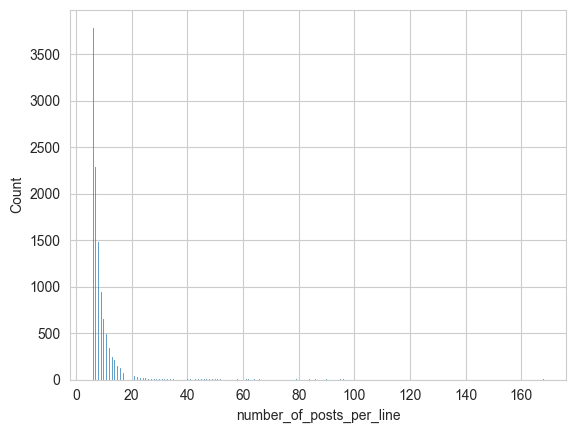

In [51]:
df_line = df_posts.groupby('line_id')['post_id'].count().reset_index().rename(columns={'post_id': 'number_of_posts_per_line'}).sort_values(by='number_of_posts_per_line', ascending=False)
sns.histplot(data=df_line, x='number_of_posts_per_line')
# plt.yscale('log')
# plt.xscale('log')

In [52]:
endt_time = df_posts.groupby('line_id')['time_posted'].max().reset_index().rename(columns={'time_posted': 'last_post_time'}).sort_values(by='last_post_time', ascending=False)
start_time = df_posts.groupby('line_id')['time_posted'].min().reset_index().rename(columns={'time_posted': 'first_post_time'}).sort_values(by='first_post_time', ascending=False)


In [53]:
df_line_users = df_posts.groupby(['line_id'])['poster_id'].nunique().reset_index().rename(columns={'poster_id': 'number_of_users_per_line'}).sort_values(by='number_of_users_per_line', ascending=False)

df_line = df_line.merge(df_line_users, on='line_id', how='inner')
df_line = df_line.merge(start_time, on='line_id', how='inner')
df_line = df_line.merge(endt_time, on='line_id', how='inner')
df_line['time_length'] = df_line['last_post_time'] - df_line['first_post_time']
df_line

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [54]:
df_line.drop(df_line[df_line['number_of_posts_per_line'] == 168].index[0], inplace=True)

In [496]:
df_line.groupby(['number_of_users_per_line'])['number_of_posts_per_line'].mean()

number_of_users_per_line
1    11.000000
2     8.708201
3     8.479136
4     8.457265
5     8.561224
6     8.090909
7    11.333333
Name: number_of_posts_per_line, dtype: float64

In [497]:
df_line[df_line['number_of_users_per_line'] == 2]

,line_id,number_of_posts_per_line,number_of_users_per_line,first_post_time,last_post_time,time_length
1,4626,96,2,2022-02-05 14:45:12,2022-02-05 16:09:55,0 days 01:24:43
2,105219,95,2,2021-02-14 12:32:49,2021-02-15 03:07:17,0 days 14:34:28
4,56870,86,2,2020-04-26 17:06:08,2020-04-26 18:42:30,0 days 01:36:22
6,87547,79,2,2021-08-16 21:37:53,2021-08-20 16:18:49,3 days 18:40:56
7,54765,79,2,2022-02-05 14:44:43,2022-02-05 16:02:31,0 days 01:17:48
...,...,...,...,...,...,...
11139,31733,6,2,2020-05-25 09:19:40,2020-05-25 12:26:54,0 days 03:07:14
11140,65570,6,2,2023-02-20 12:41:20,2023-02-20 13:51:38,0 days 01:10:18
11141,83434,6,2,2019-04-10 11:10:14,2019-04-10 17:47:44,0 days 06:37:30
11143,83470,6,2,2018-04-16 14:11:48,2018-04-16 14:27:28,0 days 00:15:40


<Axes: xlabel='number_of_posts_per_line', ylabel='Count'>

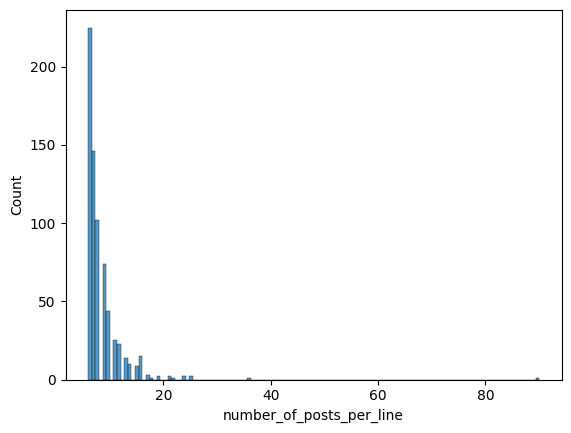

In [369]:
sns.histplot(data=df_line[df_line['number_of_users_per_line'] == 4], x='number_of_posts_per_line')

In [534]:
df_line[df_line['number_of_users_per_line'] == 1]

,line_id,number_of_posts_per_line,number_of_users_per_line,first_post_time,last_post_time,time_length
1686,10766,11,1,2023-02-13 15:57:49,2023-02-13 23:36:34,0 days 07:38:45


In [55]:
df_plot = df_line.drop(df_line[df_line['number_of_users_per_line'] == 1].index)

In [56]:
df_plot[df_plot['number_of_posts_per_line'] >= 70]

,line_id,number_of_posts_per_line,number_of_users_per_line,first_post_time,last_post_time
1,4626.0,96,2,2022-02-05 14:45:12,2022-02-05 16:09:55
2,105219.0,95,2,2021-02-14 12:32:49,2021-02-15 03:07:17
3,56877.0,90,4,2020-04-27 08:39:26,2020-04-27 22:41:25
4,56870.0,86,2,2020-04-26 17:06:08,2020-04-26 18:42:30
5,22354.0,84,3,2020-04-22 22:31:58,2020-04-22 23:44:56
6,87547.0,79,2,2021-08-16 21:37:53,2021-08-20 16:18:49
7,54765.0,79,2,2022-02-05 14:44:43,2022-02-05 16:02:31
8,58617.0,75,2,2022-02-27 03:02:04,2022-02-28 01:30:53
9,93006.0,75,2,2020-05-31 20:12:22,2020-06-07 20:30:51


/var/folders/7q/g4jn71bs78g8l7y30c_b0q_m0000gn/T/ipykernel_54391/1869585998.py:12: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  ax = sns.histplot(


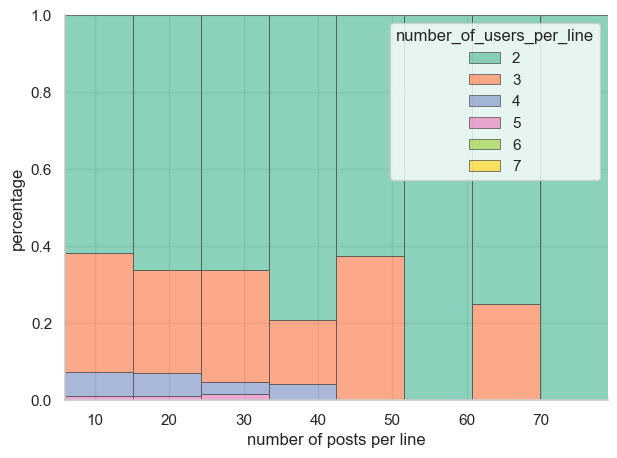

In [63]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", palette=sns.color_palette("tab10"))
sns.set_color_codes(palette='deep')


f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

ax = sns.histplot(
    # df_plot,
    df_plot[df_plot['number_of_posts_per_line'] <= 80],
    x="number_of_posts_per_line", hue="number_of_users_per_line",
    multiple="fill",
    palette=sns.color_palette("Set2"),
    edgecolor=".3",
    linewidth=.5,
    # log_scale=True,
    bins=8,
)
ax.set(xlabel='number of posts per line', ylabel='percentage')
fig = ax.get_figure()
fig.savefig('line.png', transparent=True)
# ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
# ax.set_xticks([500, 1000, 2000, 5000, 10000])


/var/folders/7q/g4jn71bs78g8l7y30c_b0q_m0000gn/T/ipykernel_54391/2584628990.py:1: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.histplot(


<Axes: xlabel='number_of_posts_per_line', ylabel='Count'>

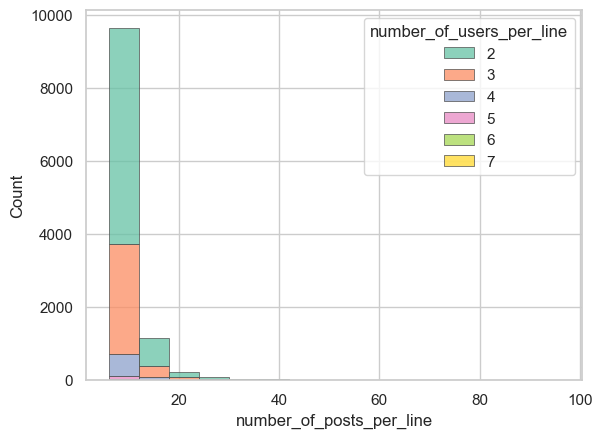

In [62]:
sns.histplot(
    df_plot,
    x="number_of_posts_per_line", hue="number_of_users_per_line",
    multiple="stack",
    palette=sns.color_palette("Set2"),
    edgecolor=".3",
    linewidth=.5,
    # log_scale=True,
    bins=15,
)
# ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())

<Axes: xlabel='number_of_posts_per_line', ylabel='Density'>

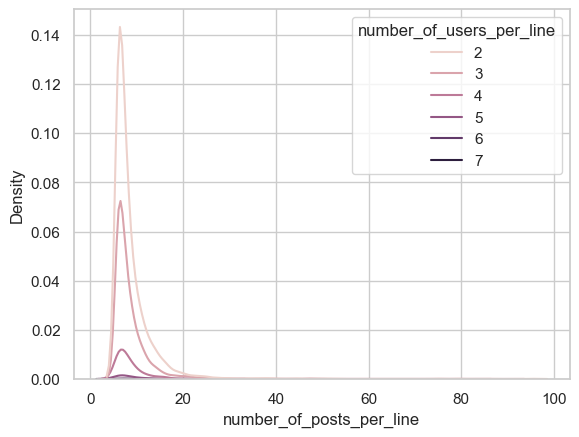

In [64]:
sns.kdeplot(data=df_plot, x='number_of_posts_per_line', hue='number_of_users_per_line')

In [65]:
from scipy.stats import ttest_ind

for x in range(1,8):
    for y in range(1,8):
        stat, p_value = ttest_ind(df_line[df_line['number_of_users_per_line'] == x]['number_of_posts_per_line'], df_line[df_line['number_of_users_per_line'] == y]['number_of_posts_per_line'])
        if p_value < 0.05:
            print(f"t-test: statistic={stat:.4f}, p-value={p_value:.4f}")
            print(f"{x} vs {y}")

t-test: statistic=2.3616, p-value=0.0182
2 vs 3
t-test: statistic=-2.3616, p-value=0.0182
3 vs 2
t-test: statistic=-2.2342, p-value=0.0453
6 vs 7
t-test: statistic=2.2342, p-value=0.0453
7 vs 6


/var/folders/7q/g4jn71bs78g8l7y30c_b0q_m0000gn/T/ipykernel_54391/3279315856.py:5: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stat, p_value = ttest_ind(df_line[df_line['number_of_users_per_line'] == x]['number_of_posts_per_line'], df_line[df_line['number_of_users_per_line'] == y]['number_of_posts_per_line'])
/Users/siyi/opt/anaconda3/envs/disc-analysis/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Users/siyi/opt/anaconda3/envs/disc-analysis/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


In [66]:
df_line[df_line['number_of_posts_per_line'] > 20]

,line_id,number_of_posts_per_line,number_of_users_per_line,first_post_time,last_post_time
1,4626.0,96,2,2022-02-05 14:45:12,2022-02-05 16:09:55
2,105219.0,95,2,2021-02-14 12:32:49,2021-02-15 03:07:17
3,56877.0,90,4,2020-04-27 08:39:26,2020-04-27 22:41:25
4,56870.0,86,2,2020-04-26 17:06:08,2020-04-26 18:42:30
5,22354.0,84,3,2020-04-22 22:31:58,2020-04-22 23:44:56
...,...,...,...,...,...
214,109171.0,21,3,2020-04-30 02:52:24,2020-04-30 03:46:44
215,57019.0,21,2,2019-12-21 02:34:09,2019-12-21 13:59:41
216,50796.0,21,2,2020-11-03 15:10:49,2020-11-03 17:33:39
217,44980.0,21,2,2020-02-06 18:29:22,2020-02-15 03:37:07


<Axes: xlabel='number_of_users_per_line', ylabel='Count'>

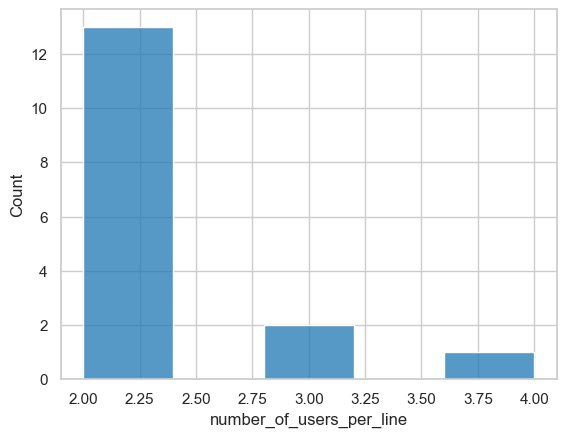

In [67]:
sns.histplot(data=df_line[df_line['number_of_posts_per_line'] > 50], x='number_of_users_per_line')

<Axes: xlabel='number_of_users_per_line', ylabel='Count'>

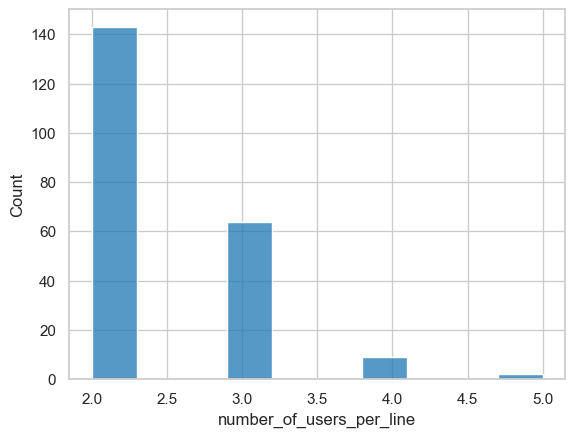

In [68]:
sns.histplot(data=df_line[df_line['number_of_posts_per_line'] > 20], x='number_of_users_per_line')

In [287]:
root_node, tree, df_test= build_conversation_tree(thread_id = 102612, df_post = df_posts, df_thread = i.incel_threads, quotes_relation_df = quotes_relation_df)

In [310]:
df_test[df_test['post_order_in_thread'] == 177].post_content.values[0]

'\n\nDregster666 said:\n\n\n\n\n\nClick to expand...\n\n'

In [289]:
plot_tree(root_node)

                                                                                                                                                                                                                         │
                                                                                                                                                                                                                         │
                                                                                                                                                                                                                         0 
                               ┌───────────────────────────┬───────────────┬────────┬─────────────────────┬───────────────────────────────────────────────────────────┬─────────┬─────┬────────────────┬─────────────────┴────┬───────────┬──────────┬─────┬─────┬─────┬─────┬─────┬─────┬──────┬─────┬──────┬─────┬──────┬─────┬─────┬─────┬──────┬──